<a href="https://colab.research.google.com/github/clashleyuncc/Intro-To-ML/blob/main/HW3P4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AttributeError: 'DataFrame' object has no attribute 'ravel'

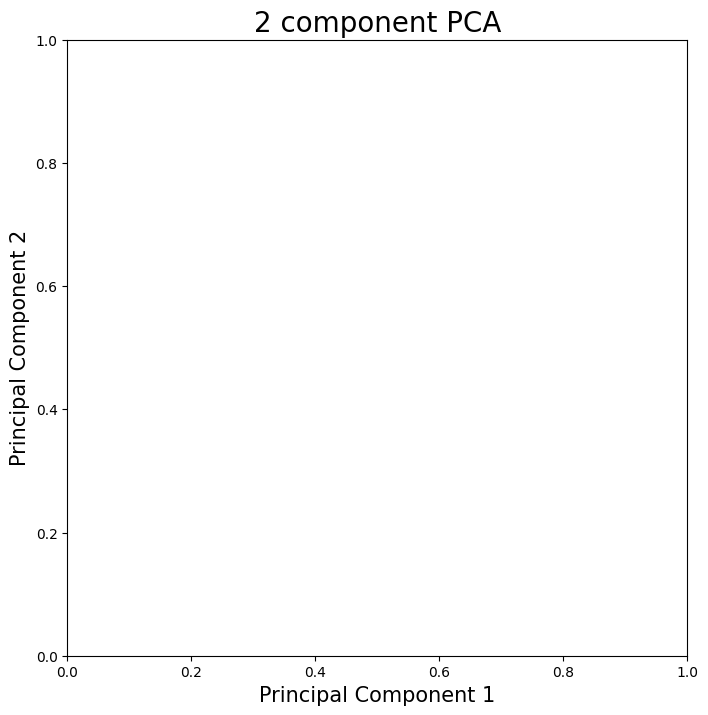

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# Problem 2a

breast = load_breast_cancer()
breast_data = breast.data
breast_input = pd.DataFrame(breast_data)

breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)

features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

breast_dataset['label'] = breast_dataset['label'].replace(0, 'Benign')
breast_dataset['label'] = breast_dataset['label'].replace(1, 'Malignant')

X = breast_dataset.iloc[:, :29].values
Y = breast_dataset.iloc[:, 30].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

Ytarget = pd.DataFrame(Y)

finalDf = pd.concat([principalDf, Ytarget], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[[0]] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()



classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

#LogisticRegression(random_state=0)

Y_pred = classifier.predict(X_test)

cnf_matrix = confusion_matrix(Y_test, Y_pred)


print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred, labels=[features_labels], pos_label='Malignant'))
print("Recall:",metrics.recall_score(Y_test, Y_pred, labels=[features_labels], pos_label='Malignant'))
print("F1:",metrics.f1_score(Y_test, Y_pred, labels=[features_labels], pos_label='Malignant'))


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
